In [1]:
#from flask import Flask, render_template, request
#import imageio
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import model_from_json
#from skimage import transform,io
import pathlib

In [2]:
pip install pytesseract

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pytesseract
from PIL import ImageEnhance, ImageFilter, Image

In [4]:
pip install opencv

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [7]:
import numpy as np
import cv2
import pytesseract
import matplotlib.pyplot as plt

In [8]:

class_names = ['High_quality_raw_materials', 'Low_quality_raw_materials']
json_file = open('my_model.json','r')
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("my_model.h5")
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
graph = tf.compat.v1.get_default_graph()


image = pathlib.Path('I')#Название папки с изображением сырья
image = tf.keras.preprocessing.image_dataset_from_directory(
  image,
  label_mode=None,
  seed=123,
  image_size=(224, 224),
  shuffle=False)


predictions = model.predict(image)
score = tf.nn.softmax(predictions)

YN = class_names[np.argmax(score)], 100 * np.max(score)


Found 1 files belonging to 1 classes.


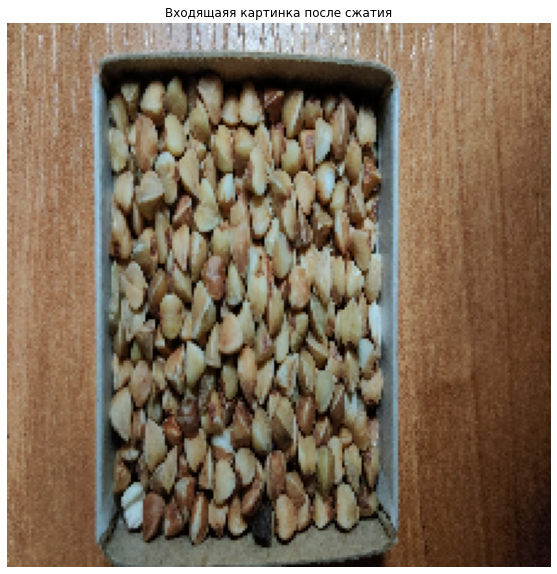

In [9]:
plt.figure(figsize=(10, 10))
for im in image.take(1):
    plt.imshow(im[0].numpy().astype("uint8"))
    plt.title('Входящаяя картинка после сжатия')
    plt.axis("off")

In [10]:
x, y = class_names
print(x, y)

High_quality_raw_materials Low_quality_raw_materials


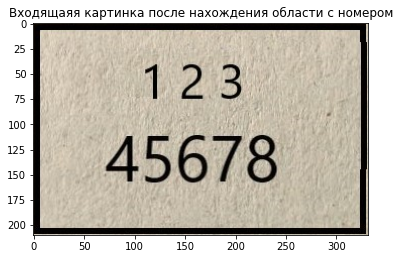

In [11]:
img = cv2.imread('Num.jpg')#Имя файла с номером вагона
#convert my image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#perform adaptive threshold so that I can extract proper contours from the image
#need this to extract the name plate from the image. 
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
contours,h = cv2.findContours(thresh,1,2)

#once I have the contours list, i need to find the contours which form rectangles.
#the contours can be approximated to minimum polygons, polygons of size 4 are probably rectangles
largest_rectangle = [0,0]
for cnt in contours:
    approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)
    if len(approx)==4: #polygons with 4 points is what I need.
        area = cv2.contourArea(cnt)
        if area > largest_rectangle[0]:
            #find the polygon which has the largest size.
            largest_rectangle = [cv2.contourArea(cnt), cnt, approx]

x,y,w,h = cv2.boundingRect(largest_rectangle[1])
#crop the rectangle to get the number plate.
roi=img[y:y+h,x:x+w]
#cv2.drawContours(img,[largest_rectangle[1]],0,(0,0,255),-1)
plt.imshow(roi, cmap = 'gray')
plt.title('Входящаяя картинка после нахождения области с номером')
plt.show()

In [12]:
gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
text = pytesseract.image_to_string(roi)
#print (text)

In [13]:
print('Из вагона с номером:')
print(text)
if  'High_quality_raw_materials' in YN:
    print('Взято сырье')
else:
    print('Сырье бракованное, отказ во взятие сырья')

Из вагона с номером:
123
45678

Взято сырье
